In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [2]:
#plot_confusion_matrix(rf_model, X, y)  
#plt.show()


In [21]:
# read in csv file
df = pd.read_csv('combined.csv', sep=';')

test = df.loc[0, ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms']]
print(test)

danceability           0.748
energy                 0.704
key                      5.0
loudness              -4.512
mode                     0.0
speechiness           0.0344
acousticness          0.0741
instrumentalness         0.0
liveness               0.088
valence                0.823
tempo                110.028
time_signature           4.0
duration_ms         284799.0
Name: 0, dtype: object


In [4]:
# create new dataframe that has no N/A values
dfna = df[df['danceability'].notna()]

In [5]:
# Check new dataframe for N/A values
dfna['danceability'].isnull().values.any()

False

In [6]:
# drop bad columns from dataframe / create inputs for Neural Network
bcX = dfna.drop(columns=['Genre','Title', 'Track URL', 'Artist'])
bcy = dfna.Genre
bcyd = pd.get_dummies(bcy)

In [7]:
# create scale to normalize input values
scaler = MinMaxScaler(feature_range=(-1,1))

In [8]:
# convert inputs to Neural Network to array for normalization
dfData = bcX.to_numpy()

In [9]:
# fit the scaler object to our input data
print(scaler.fit(dfData))

MinMaxScaler(feature_range=(-1, 1))


In [10]:
# normalize inputs to Neural Network
bcXn = scaler.transform(dfData)

In [11]:
# convert array of inputs back to dataframe now that they have been normalized
bcXndf = pd.DataFrame(bcXn, columns=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature'])

In [12]:
# check to make sure normalization worked
bcXndf.head()

X_train, X_test, y_train, y_test = train_test_split(bcXndf, bcyd, test_size=0.33, random_state=42)

In [13]:
# it seems like the more hidden layers, the higher the accuracy will go...
nn_model = Sequential()
nn_model.add(Dense(13, input_shape=(13,), activation='relu'))
nn_model.add(Dense(26, activation='relu'))
nn_model.add(Dense(26, activation='relu'))
nn_model.add(Dense(26, activation='relu'))
nn_model.add(Dense(26, activation='relu'))
nn_model.add(Dense(11, activation='sigmoid'))

In [14]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
nn_model.fit(X_train,y_train, epochs=500, batch_size=10)

pickle.dump(nn_model, open('nn_model.sav', 'wb'))

Epoch 1/500
141/141 [==============================] - 1s 692us/step - loss: 2.3375 - accuracy: 0.1654
Epoch 2/500
141/141 [==============================] - 0s 694us/step - loss: 2.1043 - accuracy: 0.2434
Epoch 3/500
141/141 [==============================] - 0s 734us/step - loss: 1.9652 - accuracy: 0.3080
Epoch 4/500
141/141 [==============================] - 0s 736us/step - loss: 1.8672 - accuracy: 0.3336
Epoch 5/500
141/141 [==============================] - 0s 762us/step - loss: 1.7970 - accuracy: 0.3620
Epoch 6/500
141/141 [==============================] - 0s 767us/step - loss: 1.7526 - accuracy: 0.3825
Epoch 7/500
141/141 [==============================] - 0s 754us/step - loss: 1.7143 - accuracy: 0.3861
Epoch 8/500
141/141 [==============================] - 0s 700us/step - loss: 1.6918 - accuracy: 0.4116
Epoch 9/500
141/141 [==============================] - 0s 678us/step - loss: 1.6665 - accuracy: 0.4074
Epoch 10/500
141/141 [==============================] - 0s 760us/step - l

In [26]:
pickle.dump(nn_model, open('./nn_model.h5', 'wb'))
# nn_model = pickle.load(open('./nn_model.h5', 'rb'))

y_pred = nn_model.predict(X_test)
print(y_pred)

INFO:tensorflow:Assets written to: ram://76a3b516-01c1-41a5-a9db-2e0aeb8b67c7/assets
22/22 [==============================] - 0s 1ms/step
[[8.3783224e-02 1.2935153e-01 7.9590165e-05 ... 1.7360764e-02
  9.3562496e-01 7.8683825e-06]
 [1.4470410e-01 9.0388823e-01 7.1888006e-01 ... 3.0022320e-01
  3.3224753e-01 1.1014533e-04]
 [1.1182200e-01 1.6338018e-01 1.9535674e-03 ... 4.2654101e-02
  2.5800666e-02 7.5016171e-01]
 ...
 [4.5738003e-01 9.9301738e-01 7.3244862e-02 ... 3.3270724e-02
  5.1901219e-03 1.2905286e-01]
 [7.4726659e-01 2.9422012e-03 6.1057862e-03 ... 8.7968722e-02
  6.2474269e-01 1.7193945e-01]
 [9.3287146e-01 2.9098443e-04 9.5165354e-01 ... 9.9960101e-01
  4.3347597e-01 6.4295996e-04]]


In [ ]:

genres = {
    0:'Blues',
    1:'Country',
    2:'Dance/Electronic',
    3:'Folk',
    4:'Hip Hop',
    5:'Indie Pop',
    6:'Jazz',
    7:'Metal',
    8:'Pop',
    9:'R&B',
    10:'Rock' 
}

genre_pred = [genres[np.where(pred == np.amax(pred))[0][0]] for pred in y_pred]

genre_true = [genres[true.index(1)] for true in y_test.values.tolist()]

for i in range(len(y_pred)):
    print(genre_pred[i], genre_true[i])



Hip Hop Hip Hop
Country Country
Dance/Electronic Pop
Rock Country
Folk Blues
Folk Country
Dance/Electronic Pop
Pop R&B
Rock Metal
Pop R&B
Metal Metal
Folk Folk
Country Pop
Metal Rock
Pop Rock
Hip Hop Hip Hop
Folk Folk
Folk Jazz
Dance/Electronic Pop
Blues Jazz
Metal Metal
Hip Hop Hip Hop
Folk Jazz
R&B Dance/Electronic
Country Indie Pop
Blues Blues
Pop Hip Hop
Dance/Electronic Pop
Pop Dance/Electronic
Blues Rock
Dance/Electronic Dance/Electronic
Rock Metal
Hip Hop R&B
Metal Metal
Rock Rock
Country Country
Metal Dance/Electronic
Folk Blues
Dance/Electronic Hip Hop
Rock Country
Indie Pop Blues
Blues R&B
Folk Blues
Metal Metal
R&B Pop
R&B R&B
Jazz R&B
Dance/Electronic Dance/Electronic
Country Rock
Folk Country
Metal Metal
Metal Dance/Electronic
Metal Rock
Hip Hop Pop
Indie Pop Country
Country Country
Country Country
Pop Hip Hop
Folk Folk
R&B Pop
Folk Folk
Rock Dance/Electronic
R&B Pop
Blues Blues
Metal Dance/Electronic
Folk Rock
Country Indie Pop
Rock Dance/Electronic
R&B Pop
Country Blues


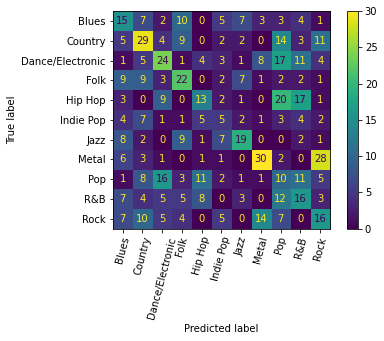

In [ ]:
cm = confusion_matrix(genre_true, genre_pred,  labels=list(genres.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(genres.values()))
disp.plot()
plt.rcParams["figure.figsize"] = (5,5)
plt.xticks(rotation=75)
plt.show()


In [32]:
bcX.append(test)
dfData = bcX.to_numpy()
Xn = scaler.transform(dfData)
Xndf = pd.DataFrame(Xn, columns=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature'])
xn = Xndf.iloc[[-1]]
prediction = nn_model.predict(xn)
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[9.2258668e-01 2.8276226e-02 1.9772444e-06 1.3402254e-02 1.2939062e-04
  1.2597816e-01 9.8435104e-01 7.2517362e-04 4.1337166e-02 6.8471633e-02
  9.6993184e-01]]


C:\Users\megha\AppData\Local\Temp\ipykernel_22012\1961111371.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bcX.append(test)
